<a href="https://colab.research.google.com/github/vijaythapakdata/HeartDiseasePrediction/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependecies

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Data Collection

In [3]:
heart_data=pd.read_csv("/content/heart.csv")

In [4]:
#print first 5 rows
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#print last five rows
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
#check number of rows and columns
heart_data.shape

(1025, 14)

In [7]:
#information
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Check null values

In [8]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing values in the entire datasets


In [9]:
#print statstics
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


correlation of datasets

In [10]:
correlation=heart_data.corr()

Print heatmap

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

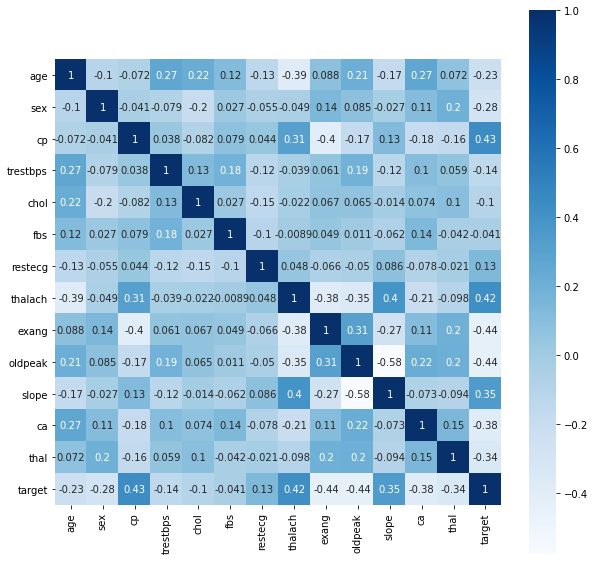

In [12]:
plot=plt.figure(figsize=(10,10))
sns.heatmap(correlation,square=True, cbar=True, annot=True, annot_kws={"size":10},cmap="Blues")

Seprate datasets

In [13]:
X=heart_data.drop(columns="target", axis=1)

In [14]:
Y=heart_data["target"]

In [15]:
print(X)

      age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0      52    1   0       125   212  ...      0      1.0      2   2     3
1      53    1   0       140   203  ...      1      3.1      0   0     3
2      70    1   0       145   174  ...      1      2.6      0   0     3
3      61    1   0       148   203  ...      0      0.0      2   1     3
4      62    0   0       138   294  ...      0      1.9      1   3     2
...   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
1020   59    1   1       140   221  ...      1      0.0      2   0     2
1021   60    1   0       125   258  ...      1      2.8      1   1     3
1022   47    1   0       110   275  ...      1      1.0      1   1     2
1023   50    0   0       110   254  ...      0      0.0      2   0     2
1024   54    1   0       120   188  ...      0      1.4      1   1     3

[1025 rows x 13 columns]


In [16]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Spliting and training data

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=10)

In [18]:
print(X.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1025, 13) (820, 13) (205, 13) (820,) (205,)


Fit the model

In [19]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation

Accuracy score of the model

In [20]:
x_train_prediction=model.predict(x_train)

x_train_accuracy=accuracy_score(x_train_prediction,y_train)

In [21]:
print("The accuracy of the training data", x_train_accuracy)

The accuracy of the training data 0.8524390243902439


In [22]:
x_test_prediction=model.predict(x_test)

x_test_accuracy=accuracy_score(x_test_prediction,y_test)

In [23]:
print("The accuracy of the test data",x_test_accuracy)

The accuracy of the test data 0.8536585365853658


Building a preductive system

In [24]:
Y.value_counts()

1    526
0    499
Name: target, dtype: int64

0-> not defective heart
1-> having heart disease

In [26]:
input_data=(70,1,0,145,174,0,1,125,1,2.6,0,0,3)

#conevrting it into numpy array
input_data_numpy=np.asarray(input_data)

#reshaped the array
input_data_reshaped=input_data_numpy.reshape(1,-1)

#prediction

prediction=model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==0):
  print("Person is not suffering from any heart disease")

else:

  print("Person has a heart disease")

[0]
Person is not suffering from any heart disease
